## Importando librerías

In [3]:
from keras.datasets import mnist
from keras import layers, models
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

## Nuestro set de datos

In [4]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 7s 1us/step


In [5]:
train_data.shape

(60000, 28, 28)

In [6]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

<function matplotlib.pyplot.show(close=None, block=None)>

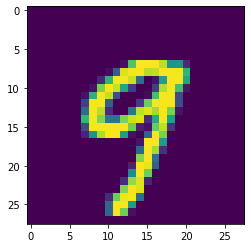

In [7]:
plt.imshow(train_data[45])
plt.show

In [8]:
train_labels[45]

9

## Creando un modelo de datos

In [9]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))

In [10]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Limpieza de datos

In [11]:
x_train = train_data.reshape((60000,28*28))
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000,28*28))
x_test = x_test.astype('float32')/255

In [12]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [13]:
train_labels[0]

5

In [14]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Entrenando el modelo

In [15]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2567 - accuracy: 0.9261
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1037 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0677 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0496 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0376 - accuracy: 0.9885


## Evaluando sobre data de test

In [16]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0649 - accuracy: 0.9808


[0.0648660734295845, 0.9807999730110168]